In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('dataset_bps_12.csv', sep=',')
df

,0,1,2,3,4,5,6,7,8,9,10,11,target
0,38.90,38.90,41.31,34.96,41.41,31.12,32.15,38.90,41.41,31.12,38.90,41.41,0
1,38.90,38.90,41.31,41.41,33.81,38.90,38.90,41.41,31.12,41.31,32.15,38.90,0
2,38.90,31.12,41.41,38.90,32.15,34.96,41.31,31.12,34.96,32.15,33.28,38.90,0
3,41.41,38.50,34.96,32.15,33.28,38.90,32.15,31.12,33.28,31.12,32.15,38.90,0
4,32.15,41.31,32.15,38.90,41.31,34.96,34.96,32.15,41.31,32.15,41.41,31.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,32.91,38.50,32.15,33.28,33.81,33.28,38.90,31.12,32.91,38.50,41.41,31.12,1
797,32.91,31.12,38.90,33.28,33.81,33.28,38.90,31.12,32.91,38.50,41.41,31.12,1
798,32.91,31.12,38.90,41.31,34.96,34.96,32.91,41.31,38.90,38.90,31.12,32.91,1
799,32.91,31.12,38.90,41.31,41.41,32.15,34.96,41.31,38.90,38.90,31.12,32.91,1


In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_pred = rf_classifier.predict(X_test)

Accuracy: 0.8012422360248447
Confusion matrix:
[[78  9]
 [23 51]]
Precision: 0.8111386138613861
Recall: 0.79287045666356
F1-Score: 0.7954906319466497


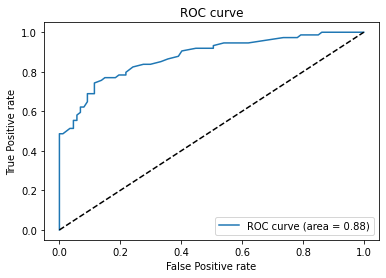

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)


precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)


recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)


f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)


y_scores = rf_classifier.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)


plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()